<h1> Notebook de exploración del dataset de clasificación de autos por marca </h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from pathlib import Path
import random
import numpy as np

In [7]:
#get all the classes in names.csv
NAMES_CSV = '/home/manuramirezsilva/Documents/Vision-Artificial/tpf_VA_RamirezSilva_Diaz/data/stanford_cars/names.csv'
names_df = pd.read_csv(NAMES_CSV, header=None)
names = names_df[0].tolist()   
print(f"Number of classes: {len(names)}")
# Display the first few class names
print("Class names:", names[:10])  # Display first 10 class names 

Number of classes: 49
Class names: ['AM', 'Acura', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet']


/tmp/ipykernel_169615/3802741297.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


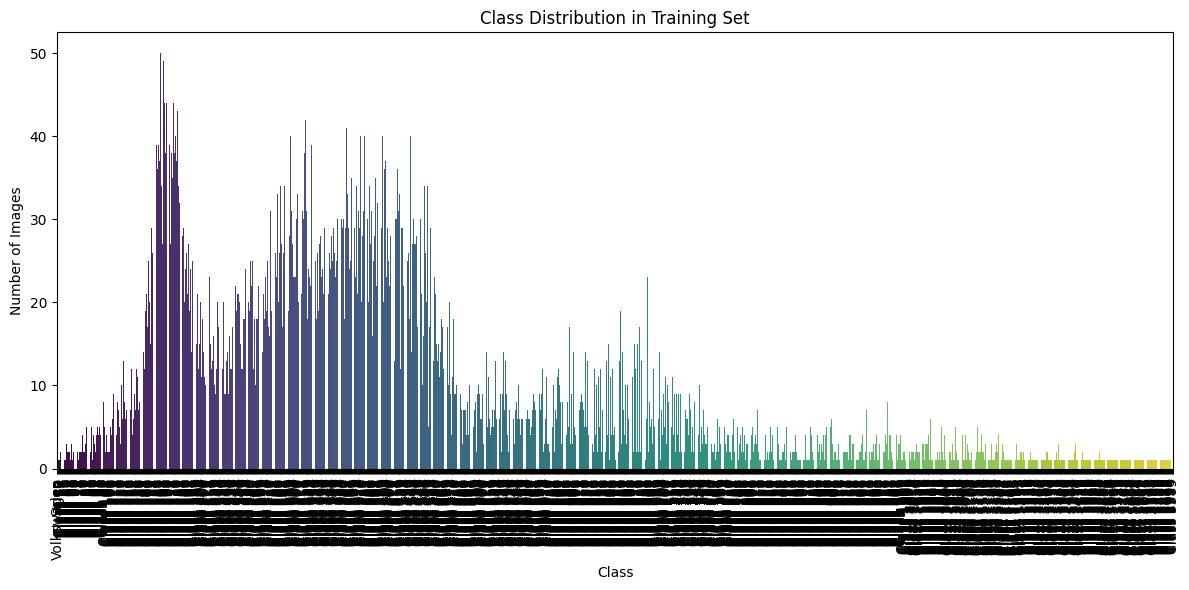

In [12]:
#Show istogram of class distribution where the format in anno_data is img_name,x1,x2,y1,y2,class_id
anno_train_csv = '/home/manuramirezsilva/Documents/Vision-Artificial/tpf_VA_RamirezSilva_Diaz/data/stanford_cars/anno_train.csv'
anno_train_df = pd.read_csv(anno_train_csv, header=None)
class_counts = anno_train_df[4].value_counts().sort_index()
#Only put the class names in the x axis
#A bug occuras and the names seem deformed and elongated (non readable)
class_counts.index = class_counts.index.map(lambda x: names[x] if x < len(names) else f'Class {x}')
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Set')
plt.tight_layout()
plt.show()

<h1> 3. Ejemplos visuales por clase </h1>

In [ ]:
# === 3. Ejemplos visuales por clase ===

# Definir la carpeta de entrenamiento (ajustar si es necesario)
train_dir = Path("dataset/train")  # o "train", según la estructura

# Mostrar una imagen aleatoria por clase
plt.figure(figsize=(15, 8))
for i, marca in enumerate(target_counts.index[:10]):  # máximo 10 marcas para mostrar
    class_dir = train_dir / marca
    if not class_dir.exists():
        continue
    img_paths = list(class_dir.glob("*.jpg")) + list(class_dir.glob("*.png"))
    if img_paths:
        img = Image.open(random.choice(img_paths)).convert("RGB")
        plt.subplot(2, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(marca)
plt.suptitle("Ejemplos de cada clase")
plt.tight_layout()
plt.show()

<h1>4. Verificación de balanceo de clases</h1>

In [ ]:
# Usar coeficiente de variación como métrica simple
def coefficient_of_variation(data):
    """Calcula el coeficiente de variación."""
    return np.std(data) / np.mean(data) 


<h1>5. Verificación de integridad </h1>

In [ ]:
def verificar_imagenes(carpeta):
    errores = []
    for path in Path(carpeta).rglob("*.jpg"):
        try:
            with Image.open(path) as img:
                img.verify()
        except Exception as e:
            errores.append((path, str(e)))
    return errores

errores_train = verificar_imagenes("dataset/train")
print(f"\nImágenes corruptas en 'train': {len(errores_train)}")
if errores_train:
    for path, err in errores_train[:5]:
        print(f"{path}: {err}")

# (Podés repetir lo mismo para 'val' o 'test' si querés)